# **Task 1: EDA and Visualization of a Real-World Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1-Load dataset**

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

Display first few rows 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


display information about dataset

In [4]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Display statistical summary

In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# **2- Data Cleaning**

Handle missing values

In [6]:
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Fills missing numeric values with median

In [7]:
df.fillna(df.median(numeric_only=True), inplace=True) 
df.dropna(inplace=True)  

checking missing values removed.

In [8]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Checking Duplicates

In [9]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


This dataset has no duplicate values

Detecting and Removing Outliers

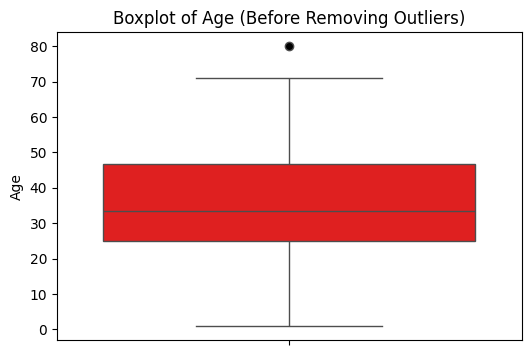

In [10]:
def plot_age_boxplot(data, title):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data['Age'], color='red', flierprops={"marker": "o", "markerfacecolor": "black"})
    plt.title(f"Boxplot of Age ({title})")
    plt.show()
# Step 1: Visualize "Age" Before Removing Outliers
plot_age_boxplot(df, "Before Removing Outliers")

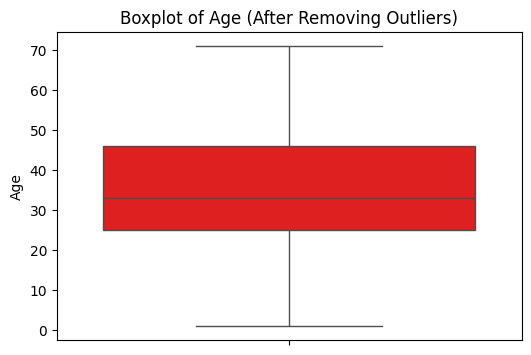

In [11]:
# Step 2: Remove Outliers using IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating a new dataframe without outliers
df_cleaned = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Step 3: Visualize "Age" After Removing Outliers
plot_age_boxplot(df_cleaned, "After Removing Outliers")

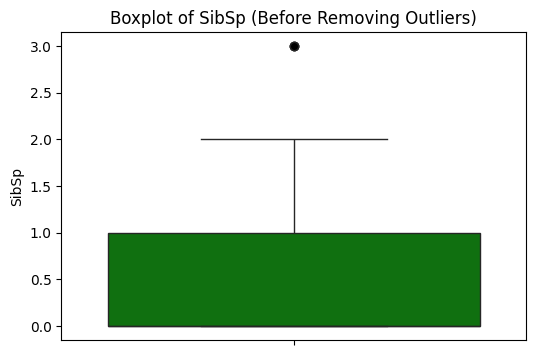

In [12]:
def plot_SibSp_boxplot(data, title):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data['SibSp'], color='green', flierprops={"marker": "o", "markerfacecolor": "black"})
    plt.title(f"Boxplot of SibSp ({title})")
    plt.show()
# Step 1: Visualize "SibSp" Before Removing Outliers
plot_SibSp_boxplot(df, "Before Removing Outliers")

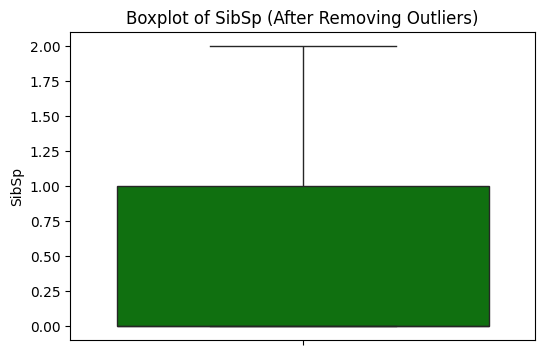

In [13]:
# Step 2: Remove Outliers using IQR method
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating a new dataframe without outliers
df_cleaned = df[(df['SibSp'] >= lower_bound) & (df['SibSp'] <= upper_bound)]

# Step 3: Visualize "SibSp" After Removing Outliers
plot_SibSp_boxplot(df_cleaned, "After Removing Outliers")

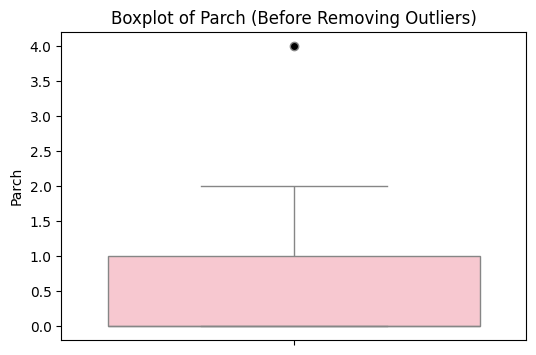

In [14]:
def plot_Parch_boxplot(data, title):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data['Parch'], color='pink', flierprops={"marker": "o", "markerfacecolor": "black"})
    plt.title(f"Boxplot of Parch ({title})")
    plt.show()
# Step 1: Visualize "Parch" Before Removing Outliers
plot_Parch_boxplot(df, "Before Removing Outliers")

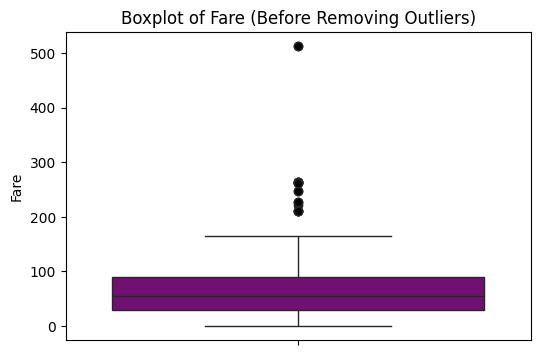

In [15]:
def plot_Fare_boxplot(data, title):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data['Fare'], color='purple', flierprops={"marker": "o", "markerfacecolor": "black"})
    plt.title(f"Boxplot of Fare ({title})")
    plt.show()
# Step 1: Visualize "Fare" Before Removing Outliers
plot_Fare_boxplot(df, "Before Removing Outliers")

# **3- Visualizations**

bar charts for categorical variables.

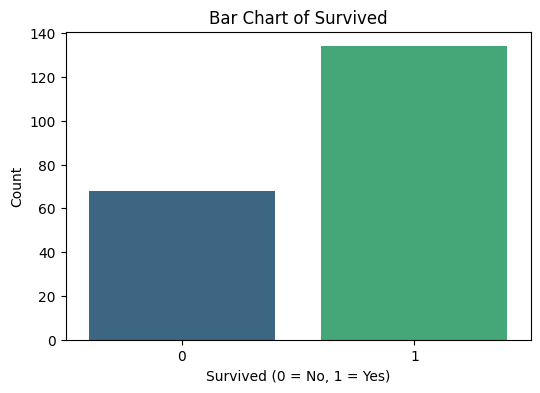

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Survived', palette="viridis", legend=False)
plt.title("Bar Chart of Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

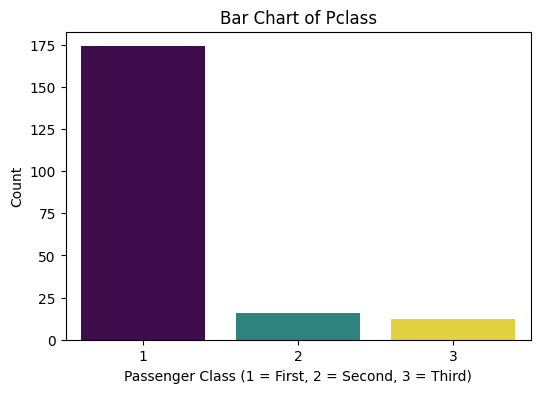

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Pclass', palette="viridis", legend=False)
plt.title("Bar Chart of Pclass")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count")
plt.show()

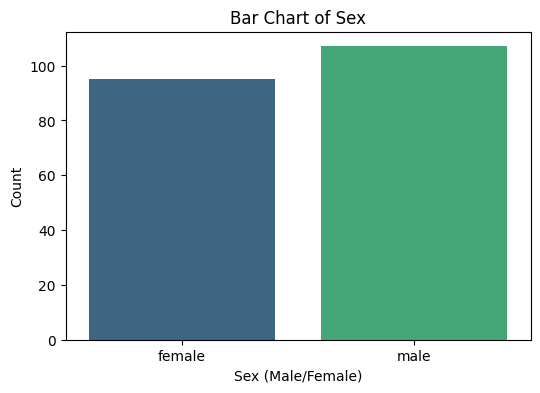

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Sex', palette="viridis", legend=False)
plt.title("Bar Chart of Sex")
plt.xlabel("Sex (Male/Female)")
plt.ylabel("Count")
plt.show()

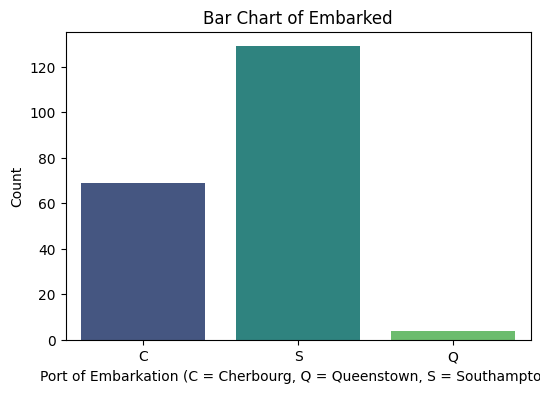

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', hue='Embarked', palette="viridis", legend=False)
plt.title("Bar Chart of Embarked")
plt.xlabel("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Count")
plt.show()

Plot histograms for numeric distributions. 

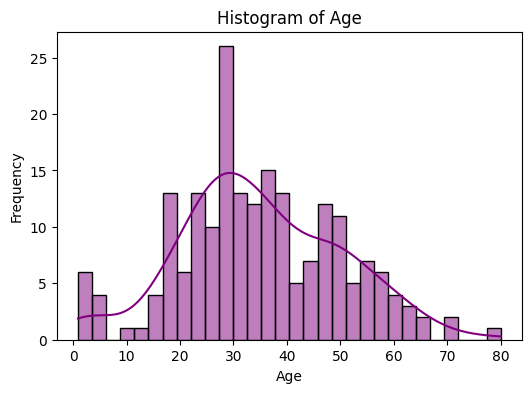

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='purple')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

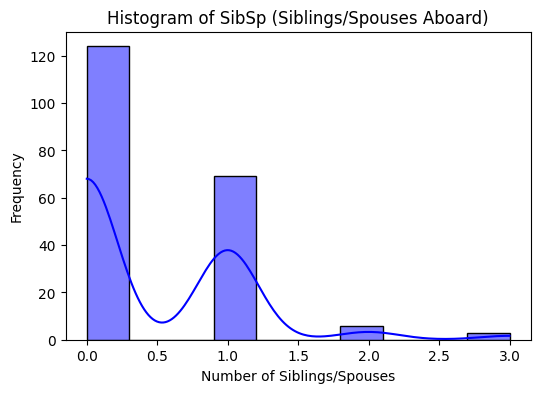

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['SibSp'], bins=10, kde=True, color='blue')
plt.title("Histogram of SibSp (Siblings/Spouses Aboard)")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Frequency")
plt.show()

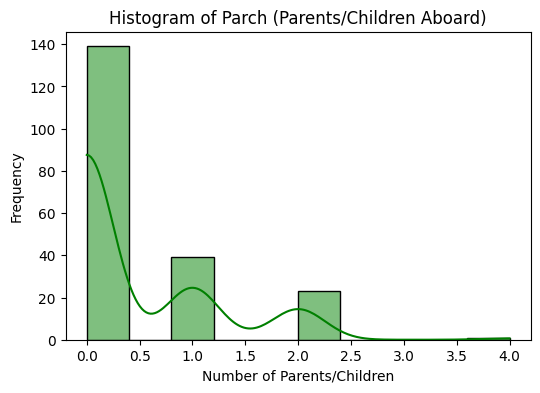

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Parch'], bins=10, kde=True, color='green')
plt.title("Histogram of Parch (Parents/Children Aboard)")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Frequency")
plt.show()

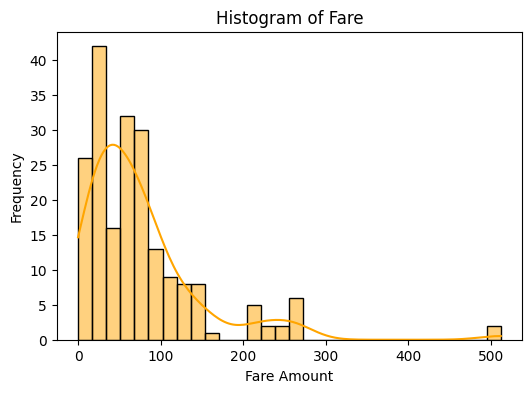

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], bins=30, kde=True, color='orange')
plt.title("Histogram of Fare")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

Correlation heatmap for numeric features. 

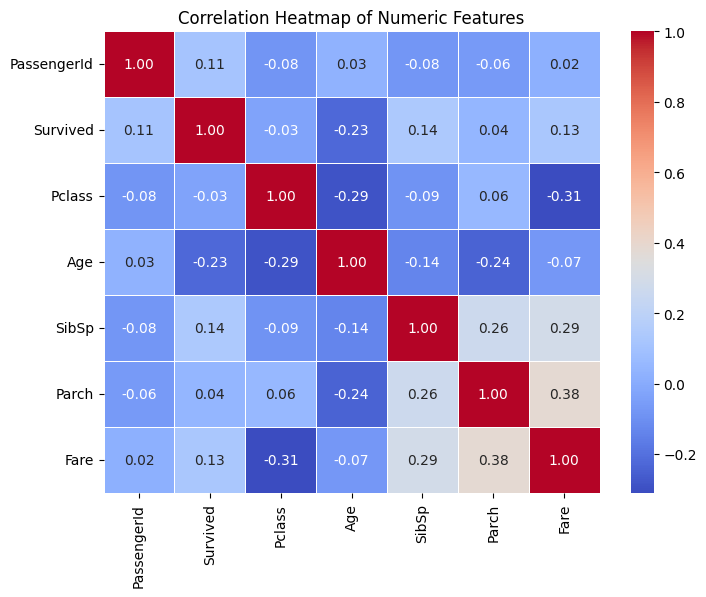

In [24]:
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# **4-Key Findings**

Missing Values:

- Age and Fare had missing values, which were handled using median imputation.
- Cabin had too many missing values, which might require further handling (e.g., dropping or feature engineering).
- Embarked had a few missing values, which were removed.

Duplicates:

- No duplicate rows were found in the dataset.


Outliers (Detected & Managed using IQR Method):

- Age had one outlier at 80 years old, which was removed.
- SibSp had outliers at 3, which were removed.
- Parch had an outlier at 4, which was removed.
- Fare had multiple high-value outliers (e.g., 512.33), but their removal might affect important insights.


Bar Charts for Categorical Features:

- Survival Rate: More people did not survive (0) than those who survived (1).
- Pclass: Most passengers were in third class.
- Sex: More males than females were on board.
- Embarked: Most passengers embarked from Southampton (S).

 Histograms for Numeric Features:

- Age Distribution: Most passengers were between 20-40 years old.
- SibSp & Parch: Most had zero or one family member aboard.
- Fare Distribution: Skewed to the right (some paid very high ticket prices).

Correlation Heatmap:

- Strongest Positive Correlation: Pclass and Fare (higher-class passengers paid more).
- Survival Correlation: Pclass and Survived showed a significant correlation (first-class passengers had higher survival rates).

